# Scikit-Image

Documentación oficial en: https://scikit-image.org/

Según ella: **scikit-image** es una colección de algoritmos para el procesamiento de imágenes. Está disponible de forma gratuita y sin restricciones. Nos enorgullecemos de contar con un código de alta calidad revisado por pares y escrito por una comunidad activa de voluntarios.

## 1. Sección de muestra hecha por Federico

In [1]:
import matplotlib.pyplot as plt
from skimage import data, io

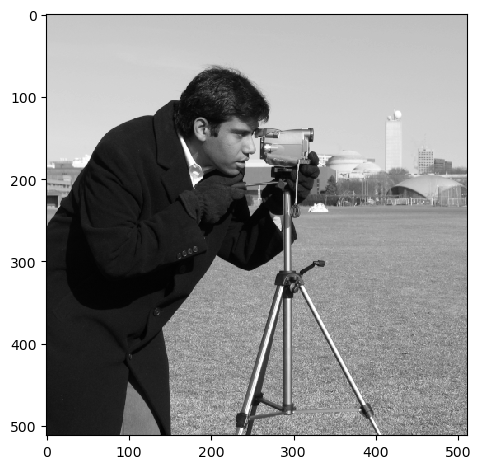

In [2]:
# Cargar una imagen de muestra
imagen = data.camera()

# Mostrar la imagen
io.imshow(imagen);

**NOTA:** El código original de Federico usa una dirección local de su computador, por lo que al usarlo sin más dará error. No obstante, es algo fácil de corregir y podemos usar imágenes que tengamos en nuestro entorno local. El código de Federico era:

```
# Cargar una imagen desde una ruta local
imagen = io.imread('C:/Users/Federico/Downloads/Python Total para Data Science.png')
```

Personalmente, he optado por algo un poquito más sofisticado... 😛

In [3]:
import os
from dotenv import load_dotenv

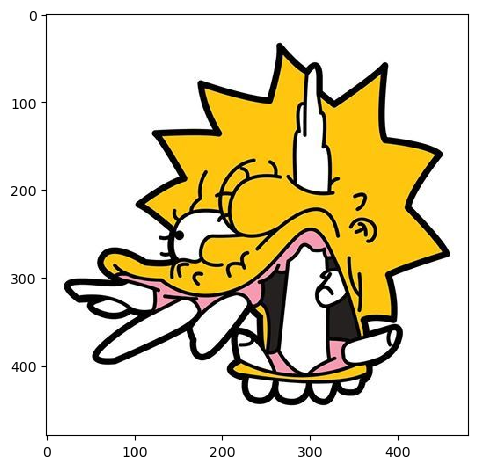

In [4]:
load_dotenv('.env')

# Cargar una imagen desde una ruta local
imagen = io.imread(os.environ['IMG'])

# Mostrar la imagen
io.imshow(imagen);

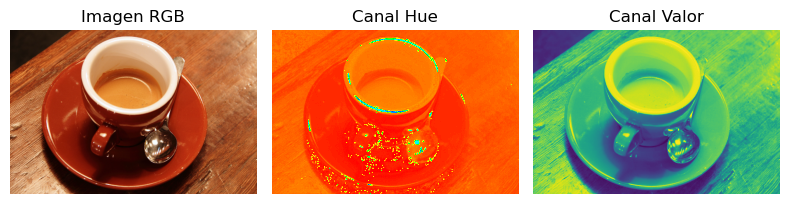

In [5]:
from skimage import data
from skimage.color import rgb2hsv

rgb_img = data.coffee()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("Imagen RGB")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Canal Hue")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Canal Valor")
ax2.axis('off')

fig.tight_layout()

## 2. Sección de exploración personal

Veamos qué tal carga una imagen desde internet...

In [22]:
import numpy as np

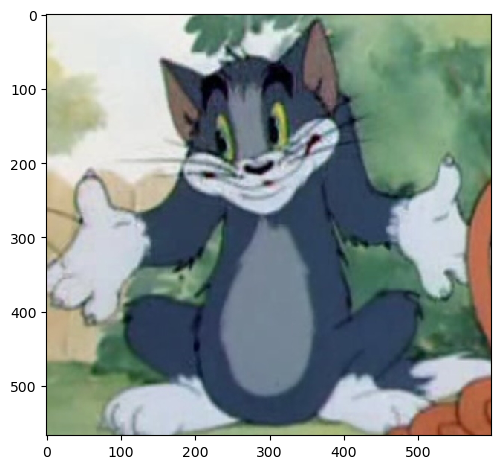

In [24]:
url: str = 'https://i.kym-cdn.com/photos/images/original/001/722/871/632.jpg'

shrugging_tom: np.ndarray = io.imread(url)

io.imshow(shrugging_tom);

Cambiémosle el "valor":

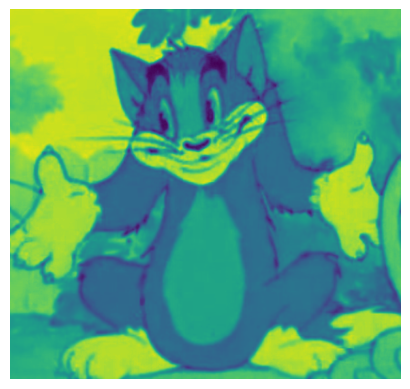

In [25]:
hsv_image: object = rgb2hsv(shrugging_tom)
value_img: object = hsv_image[:, :, 2]

fig, ax = plt.subplots()

ax.imshow(value_img)
ax.axis('off')

plt.show()

Usemos otro colormap:

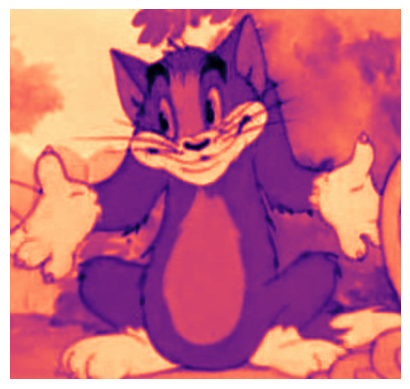

In [26]:
hsv_image: object = rgb2hsv(shrugging_tom)
value_img: object = hsv_image[:, :, 2]

fig, ax = plt.subplots()

ax.imshow(value_img, cmap='magma')
ax.axis('off')

plt.show()

Desde la documentación, probemos [encontrar el contorno](https://scikit-image.org/docs/stable/auto_examples/edges/plot_contours.html), pero con nuestra imagen:

In [30]:
from skimage import color, measure

NOTA: `find_contours()` lanza error si la imagen no es un array 2D (monocromática).

In [33]:
# pasando imagen a monocromática, de array 3d a 2d
gray_shrugging_tom: np.ndarray = color.rgb2gray(shrugging_tom)
gray_shrugging_tom.shape

(567, 599)

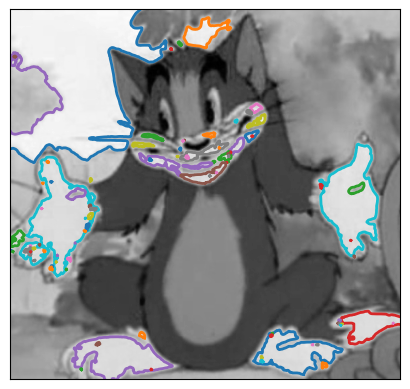

In [38]:
contours = measure.find_contours(gray_shrugging_tom, 0.8)

fig, ax = plt.subplots()
ax.imshow(gray_shrugging_tom, cmap='gray')

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Probemos el [histograma de gradientes orientadas](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html):

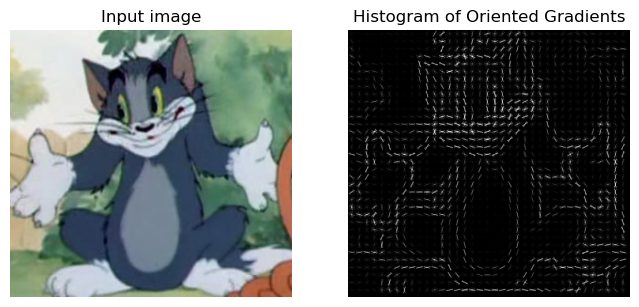

In [40]:
from skimage.feature import hog
from skimage import data, exposure


fd, hog_image = hog(
    shrugging_tom,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(shrugging_tom, cmap='gray')
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

Probemos [RAGs](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_rag_boundary.html):

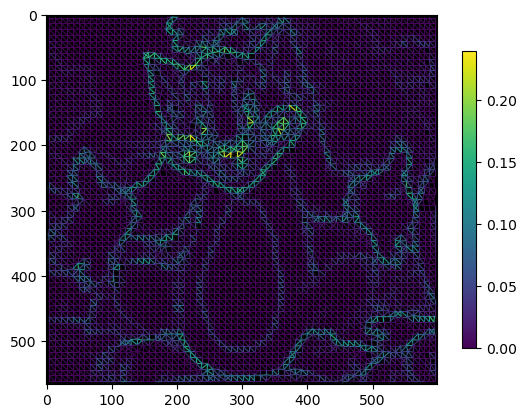

In [53]:
from skimage import graph
from skimage import data, segmentation, color, filters, io
from matplotlib import pyplot as plt


img = data.coffee()
gimg = color.rgb2gray(img)

labels = segmentation.slic(shrugging_tom, compactness=64, n_segments=4096, start_label=1)
edges = filters.sobel(gray_shrugging_tom)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(labels, edges)
lc = graph.show_rag(
    labels, g, edges_rgb, img_cmap=None, edge_cmap='viridis', edge_width=0.8
)

plt.colorbar(lc, fraction=0.03)
io.show()

Probemos [RAG Merging](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_rag_merge.html):

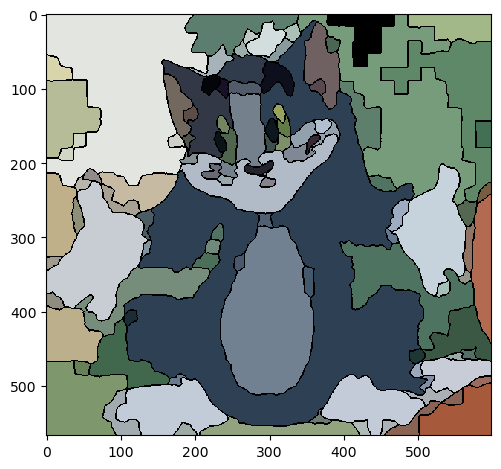

In [64]:
from skimage import io, segmentation, color
from skimage import graph
import numpy as np


def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.nodes[dst]['mean color'] - graph.nodes[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.nodes[dst]['total color'] += graph.nodes[src]['total color']
    graph.nodes[dst]['pixel count'] += graph.nodes[src]['pixel count']
    graph.nodes[dst]['mean color'] = (
        graph.nodes[dst]['total color'] / graph.nodes[dst]['pixel count']
    )


labels = segmentation.slic(shrugging_tom, compactness=32, n_segments=1024, start_label=1)
g = graph.rag_mean_color(shrugging_tom, labels)

labels2 = graph.merge_hierarchical(
    labels,
    g,
    thresh=35,
    rag_copy=False,
    in_place_merge=True,
    merge_func=merge_mean_color,
    weight_func=_weight_mean_color,
)

out = color.label2rgb(labels2, shrugging_tom, kind='avg', bg_label=0)
out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))
io.imshow(out)
io.show()

Probemos [RAG Thresholding](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_rag_mean_color.html):

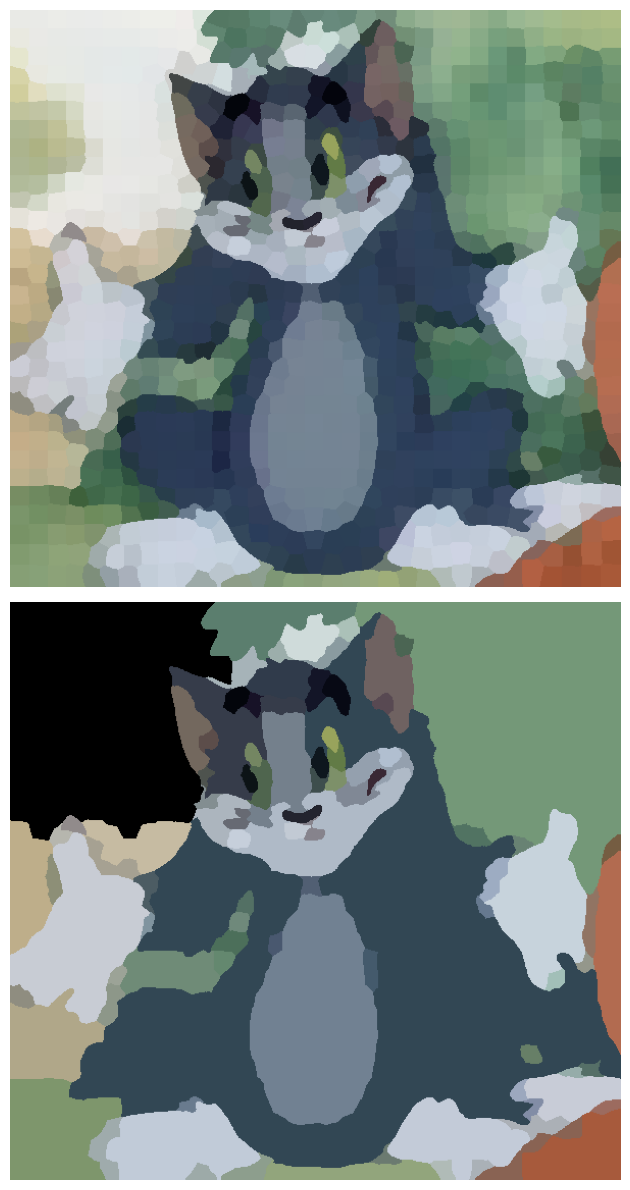

In [58]:
from skimage import segmentation, color
from skimage import graph
from matplotlib import pyplot as plt


labels1 = segmentation.slic(shrugging_tom, compactness=32, n_segments=1024, start_label=1)
out1 = color.label2rgb(labels1, shrugging_tom, kind='avg', bg_label=0)

g = graph.rag_mean_color(shrugging_tom, labels1)
labels2 = graph.cut_threshold(labels1, g, 29)
out2 = color.label2rgb(labels2, shrugging_tom, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(9, 12))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

Probemos [Thresholding](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_thresholding.html):

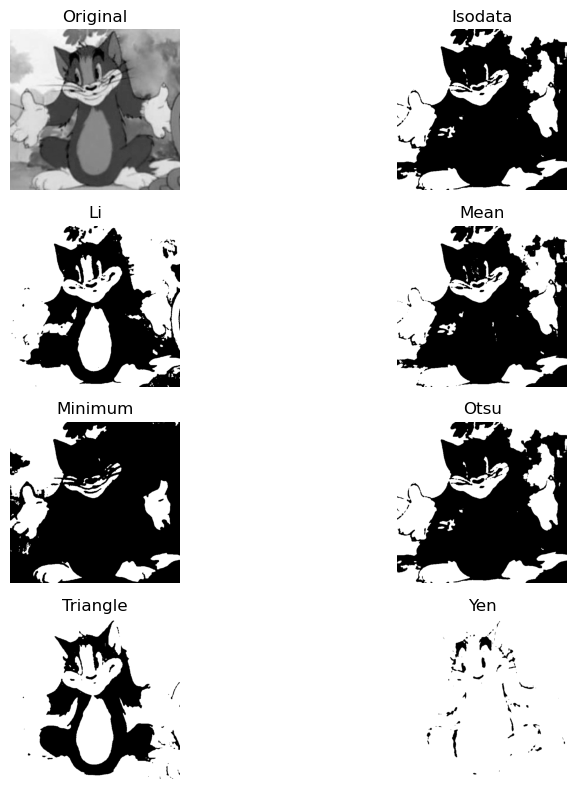

In [60]:
from skimage.filters import try_all_threshold


fig, ax = try_all_threshold(gray_shrugging_tom, figsize=(10, 8), verbose=False)
plt.show()

Probemos [Watershed Transform](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_marked_watershed.html) con marcadores:

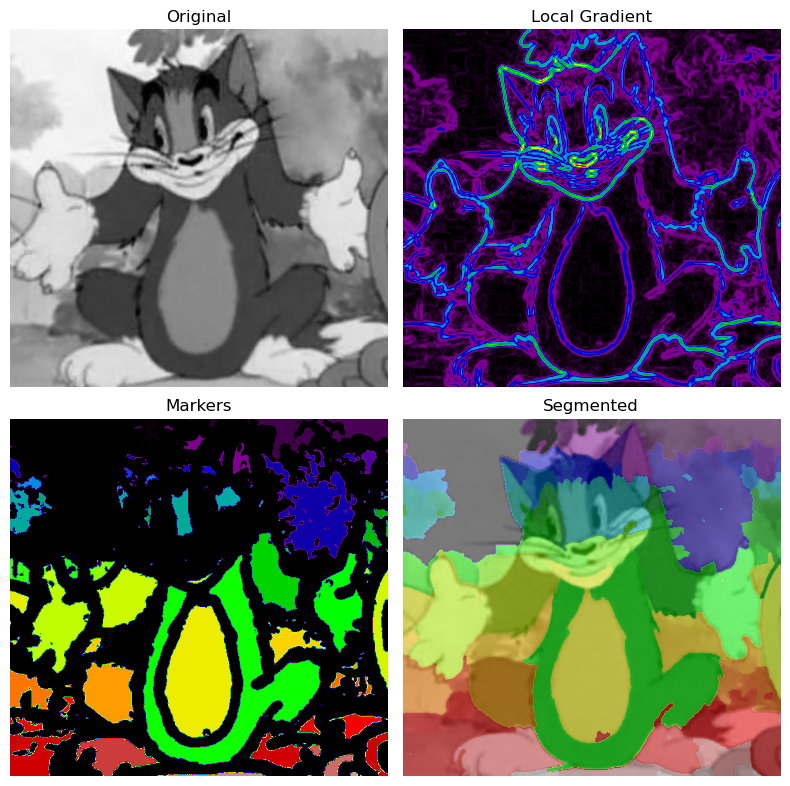

In [62]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte


image = img_as_ubyte(gray_shrugging_tom)

# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral)
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=0.5)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()